# Importación de librerías

In [ ]:
import os
import cv2
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab.patches import cv2_imshow

from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix, classification_report

# Definición de variables

In [ ]:
target_size_width = 224
target_size_height = 224
input_shape = (target_size_height, target_size_width)
model_batch_size = 50
number_of_classes = 10
epochs = 8

# Creación del diccionario de etiquetas


In [ ]:
label_dictionary = {0: 'Case',
              1: 'Dialga',
              2: 'Diario Hello Kitty',
              3: 'Forro Hello Kitty',
              4: 'Goku',
              5: 'Paleta de sombras',
              6: 'Pocillo mascotas',
              7: 'Powerbank',
              8: 'Wireless',
              9: 'Comestiquera',
              }

# Vínculo del DataSet vía Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Definición de rutas

In [ ]:
root_path = '/content/drive/MyDrive/DatasetNuevo'

train_path = root_path + '/Train'
valid_path = root_path + '/Validation'
test_path = root_path + '/Test'

In [ ]:
train_case_dir = train_path + '/0'  # Directorio con las imagenes de entrenamiento de la clase Case
train_dialga_dir = train_path + '/1'  # Directorio con las imagenes de entrenamiento de la clase Dialga
train_diario_dir = train_path + '/2'  # Directorio con las imagenes de entrenamiento de la clase Diario Hello Kitty
train_forro_dir = train_path + '/3'  # Directorio con las imagenes de entrenamiento de la clase Forro Hello Kitty
train_goku_dir = train_path + '/4'  # Directorio con las imagenes de entrenamiento de la clase Goku
train_paleta_dir = train_path + '/5'  # Directorio con las imagenes de entrenamiento de la clase Paleta de sombras
train_pocillo_dir = train_path + '/6'  # Directorio con las imagenes de entrenamiento de la clase Pocillo de mascotas
train_powerbank_dir = train_path + '/7'  # Directorio con las imagenes de entrenamiento de la Powerbank
train_wireless_dir = train_path + '/8'  # Directorio con las imagenes de entrenamiento de la clase Wireless
train_cosmetiquera_dir = train_path + '/9'  # Directorio con las imagenes de entrenamiento de la clase Cosmetiquera

valid_case_dir = valid_path + '/0'  # Directorio con las imagenes de validacion de la clase Case
valid_dialga_dir = valid_path + '/1'  # Directorio con las imagenes de validacion de la clase Dialga
valid_diario_dir = valid_path + '/2'  # Directorio con las imagenes de validacion de la clase Diario Hello Kitty
valid_forro_dir = valid_path + '/3'  # Directorio con las imagenes de validacion de la clase Forro Hello Kitty
valid_goku_dir = valid_path + '/4'  # Directorio con las imagenes de validacion de la clase Goku
valid_paleta_dir = valid_path + '/5'  # Directorio con las imagenes de validacion de la clase Paleta de sombras
valid_pocillo_dir = valid_path + '/6'  # Directorio con las imagenes de validacion de la clase Pocillo de mascotas
valid_powerbank_dir = valid_path + '/7'  # Directorio con las imagenes de validacion de la Powerbank
valid_wireless_dir = valid_path + '/8'  # Directorio con las imagenes de validacion de la clase Wireless
valid_cosmetiquera_dir = valid_path + '/9'  # Directorio con las imagenes de validacion de la clase Cosmetiquera

test_case_dir = test_path + '/0'  # Directorio con las imagenes de prueba de la clase Case
test_dialga_dir = test_path + '/1'  # Directorio con las imagenes de prueba de la clase Dialga
test_diario_dir = test_path + '/2'  # Directorio con las imagenes de prueba de la clase Diario Hello Kitty
test_forro_dir = test_path + '/3'  # Directorio con las imagenes de prueba de la clase Forro Hello Kitty
test_goku_dir = test_path + '/4'  # Directorio con las imagenes de prueba de la clase Goku
test_paleta_dir = test_path + '/5'  # Directorio con las imagenes de prueba de la clase Paleta de sombras
test_pocillo_dir = test_path + '/6'  # Directorio con las imagenes de prueba de la clase Pocillo de mascotas
test_powerbank_dir = test_path + '/7'  # Directorio con las imagenes de prueba de la Powerbank
test_wireless_dir = test_path + '/8'  # Directorio con las imagenes de prueba de la clase Wireless
test_cosmetiquera_dir = test_path + '/9'  # Directorio con las imagenes de prueba de la clase Cosmetiquera

## Propiedades del DataSet

In [ ]:
num_case_tr = len(os.listdir(train_case_dir))
num_dialga_tr = len(os.listdir(train_dialga_dir))
num_diario_tr = len(os.listdir(train_diario_dir))
num_forro_tr = len(os.listdir(train_forro_dir))
num_goku_tr = len(os.listdir(train_goku_dir))
num_paleta_tr = len(os.listdir(train_paleta_dir))
num_pocillo_tr = len(os.listdir(train_pocillo_dir))
num_powerbank_tr = len(os.listdir(train_powerbank_dir))
num_wireless_tr = len(os.listdir(train_wireless_dir))
num_cosmetiquera_tr = len(os.listdir(train_cosmetiquera_dir))

num_case_val = len(os.listdir(valid_case_dir))
num_dialga_val = len(os.listdir(valid_dialga_dir))
num_diario_val = len(os.listdir(valid_diario_dir))
num_forro_val = len(os.listdir(valid_forro_dir))
num_goku_val = len(os.listdir(valid_goku_dir))
num_paleta_val = len(os.listdir(valid_paleta_dir))
num_pocillo_val = len(os.listdir(valid_pocillo_dir))
num_powerbank_val = len(os.listdir(valid_powerbank_dir))
num_wireless_val = len(os.listdir(valid_wireless_dir))
num_cosmetiquera_val = len(os.listdir(valid_cosmetiquera_dir))

num_case_tst = len(os.listdir(test_case_dir))
num_dialga_tst = len(os.listdir(test_dialga_dir))
num_diario_tst = len(os.listdir(test_diario_dir))
num_forro_tst = len(os.listdir(test_forro_dir))
num_goku_tst = len(os.listdir(test_goku_dir))
num_paleta_tst = len(os.listdir(test_paleta_dir))
num_pocillo_tst = len(os.listdir(test_pocillo_dir))
num_powerbank_tst = len(os.listdir(test_powerbank_dir))
num_wireless_tst = len(os.listdir(test_wireless_dir))
num_cosmetiquera_tst = len(os.listdir(test_cosmetiquera_dir))

total_train = num_case_tr + num_dialga_tr + num_diario_tr + num_forro_tr + num_goku_tr + num_paleta_tr + num_pocillo_tr + num_powerbank_tr + num_wireless_tr + num_cosmetiquera_tr
total_val = num_case_val + num_dialga_val + num_diario_val + num_forro_val + num_goku_val + num_paleta_val + num_pocillo_val + num_powerbank_val + num_wireless_val + num_cosmetiquera_val
total_tst = num_case_tst + num_dialga_tst + num_diario_tst + num_forro_tst + num_goku_tst + num_paleta_tst + num_pocillo_tst + num_powerbank_tst + num_wireless_tst + num_cosmetiquera_tst

In [ ]:
print('Total training Case images:', num_case_tr)
print('Total training Dialga images:', num_dialga_tr)
print('Total training Diario images:', num_diario_tr)
print('Total training Forro images:', num_forro_tr)
print('Total training Goku images:', num_goku_tr)
print('Total training Paleta images:', num_paleta_tr)
print('Total training Pocillo images:', num_pocillo_tr)
print('Total training Powerbank images:', num_powerbank_tr)
print('Total training Wireless images:', num_wireless_tr)
print('Total training Cosmetiquera images:', num_cosmetiquera_tr)
print('-------------')
print('Total validation Case images:', num_case_val)
print('Total validation Dialga images:', num_dialga_val)
print('Total validation Diario images:', num_diario_val)
print('Total validation Forro images:', num_forro_val)
print('Total validation Goku images:', num_goku_val)
print('Total validation Paleta images:', num_paleta_val)
print('Total validation Pocillo images:', num_pocillo_val)
print('Total validation Powerbank images:', num_powerbank_val)
print('Total validation Wireless images:', num_wireless_val)
print('Total validation Cosmetiquera images:', num_cosmetiquera_val)
print('-------------')
print('Total test Case images:', num_case_tst)
print('Total test Dialga images:', num_dialga_tst)
print('Total test Diario images:', num_diario_tst)
print('Total test Forro images:', num_forro_tst)
print('Total test Goku images:', num_goku_tst)
print('Total test Paleta images:', num_paleta_tst)
print('Total test Pocillo images:', num_pocillo_tst)
print('Total test Powerbank images:', num_powerbank_tst)
print('Total test Wireless images:', num_wireless_tst)
print('Total test Cosmetiquera images:', num_cosmetiquera_tst)
print('-------------')
print('Total training images:', total_train)
print('Total validation images:', total_val)
print('Total test images:', total_tst)

Total training Case images: 200
Total training Dialga images: 200
Total training Diario images: 200
Total training Forro images: 200
Total training Goku images: 200
Total training Paleta images: 200
Total training Pocillo images: 200
Total training Powerbank images: 200
Total training Wireless images: 200
Total training Cosmetiquera images: 200
-------------
Total validation Case images: 50
Total validation Dialga images: 50
Total validation Diario images: 50
Total validation Forro images: 50
Total validation Goku images: 50
Total validation Paleta images: 50
Total validation Pocillo images: 50
Total validation Powerbank images: 50
Total validation Wireless images: 50
Total validation Cosmetiquera images: 50
-------------
Total test Case images: 100
Total test Dialga images: 100
Total test Diario images: 100
Total test Forro images: 100
Total test Goku images: 100
Total test Paleta images: 100
Total test Pocillo images: 100
Total test Powerbank images: 100
Total test Wireless images: 1

# Pre-procesamiento de imágenes

## Aumentación y preparación de datos

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1./255
                )

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size = input_shape,
                color_mode = 'rgb',
                classes = None,
                class_mode = 'categorical',
                batch_size = model_batch_size,
                shuffle = True,
                seed = 123,
                interpolation = 'nearest'
                )

valid_datagen = ImageDataGenerator(
                rescale = 1./255
                )

valid_generator = valid_datagen.flow_from_directory(
                valid_path,
                target_size = input_shape,
                color_mode = 'rgb',
                classes = None,
                class_mode = 'categorical',
                batch_size = model_batch_size,
                shuffle = True,
                seed = 123,
                interpolation = 'nearest'
                )

test_datagen = ImageDataGenerator(
                rescale = 1./255
                )

test_generator = test_datagen.flow_from_directory(
                test_path,
                target_size = input_shape,
                color_mode = 'rgb',
                classes = None,
                class_mode = 'categorical',
                shuffle = False,
                interpolation = 'nearest'
                )

Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


# Modelo de red

## Arquitectura de red

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])

In [ ]:
len(model.layers)

15

## Compilador de red

In [ ]:
#Se programa el Early Stopping para que el entrenamiento se detenga antes de que el modelo sobreaprenda, dependiendo del error de validación
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

#Se configura el Model Checkpoint para guardar el mejor modelo resultante entre todas las iteraciones del entrenamiento, con base en el error de validación
model_checkpoint = ModelCheckpoint(root_path+'/ModelosCNN/'+str(time.time())+'_weights_check.h5', save_best_only=True, monitor='val_loss', mode='min')

#Reduce el Learning Rate si el entrenamiento se estanca en alguna iteración, basándose en el error de validación
learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

# Entrenamiento de la red neuronal

In [ ]:
model_history = model.fit_generator(generator=train_generator,
                        epochs=epochs,
                        validation_data=valid_generator,
                        callbacks=[early_stopping, model_checkpoint, learning_rate])

<ipython-input-13-bc0fd138935f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(generator=train_generator,


Epoch 1/8
40/40 [==============================] - 513s 13s/step - loss: 1.9649 - accuracy: 0.2435 - val_loss: 1.4204 - val_accuracy: 0.4260 - lr: 0.0010
Epoch 2/8


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 12s 286ms/step - loss: 1.0468 - accuracy: 0.5980 - val_loss: 0.7258 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 3/8
40/40 [==============================] - 12s 287ms/step - loss: 0.4777 - accuracy: 0.8300 - val_loss: 0.4389 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 4/8
40/40 [==============================] - 10s 255ms/step - loss: 0.2514 - accuracy: 0.9155 - val_loss: 0.2989 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 5/8
40/40 [==============================] - 12s 296ms/step - loss: 0.1703 - accuracy: 0.9505 - val_loss: 0.2239 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 6/8
40/40 [==============================] - 11s 278ms/step - loss: 0.1363 - accuracy: 0.9590 - val_loss: 0.2582 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 7/8
40/40 [==============================] - 11s 279ms/step - loss: 0.1009 - accuracy: 0.9695 - val_loss: 0.2647 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 8/8
40/40 [==============================] - 10s 251ms/step - loss: 0.0785

# Métricas de entrenamiento del modelo de red neuronal

## Generación de gráficas de entrenamiento

In [ ]:
def plot_history(Exp_history):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(Exp_history.history['accuracy'])
    plt.plot(Exp_history.history['val_accuracy'])
    plt.title('Gráfica de precisión')
    plt.ylabel('Precisión')
    plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
    plt.subplot(212)
    plt.plot(Exp_history.history['loss'])
    plt.plot(Exp_history.history['val_loss'])
    plt.title('Gráfica de pérdida')
    plt.ylabel('Pérdida')
    plt.xlabel('Iteraciones')
    plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
    plt.show()

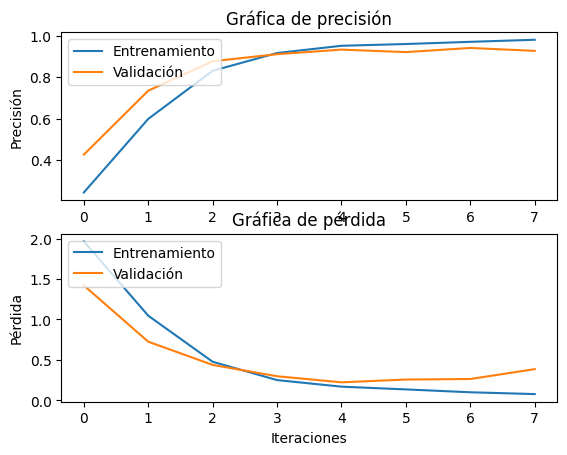

In [ ]:
plot_history(model_history)

## Evaluación

In [ ]:
evaluation = model.evaluate(test_generator)

32/32 [==============================] - 212s 7s/step - loss: 0.4738 - accuracy: 0.9320


In [ ]:
evaluation

[0.4738445580005646, 0.9319999814033508]

## Predicción de la red con imágenes de prueba

In [ ]:
test_predictions = model.predict(test_generator)

32/32 [==============================] - 4s 128ms/step


In [ ]:
predicted_test_images = []

for prediction in test_predictions:
  predicted_test_images.append(np.argmax(prediction))

In [ ]:
test_labels = []

for test_folder in range(number_of_classes):
  test_class = len(os.listdir(test_path+'/'+str(test_folder)))
  for test_image in range(test_class):
    test_labels.append(test_folder)

## Confusion Matrix

In [ ]:
model_confusion_matrix = confusion_matrix(test_labels,predicted_test_images)

#Row = True // Columns = Predictions
model_confusion_matrix

array([[ 83,   0,   0,   0,   8,   0,   6,   2,   0,   1],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  94,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  97,   0,   0,   0,   3,   0,   0],
       [  0,   1,   0,   0,  95,   0,   0,   4,   0,   0],
       [  0,   0,   0,   0,   0,  96,   0,   4,   0,   0],
       [  0,   7,   0,   0,   0,   0,  93,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [ 26,   0,   0,   0,   0,   0,   0,   0,  74,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]])

## Classification Report

In [ ]:
model_classification_report = classification_report(test_labels,predicted_test_images,target_names=['Case','Dialga','Diario Hello Kitty', 'Forro Hello Kitty', 'Goku', 'Paleta de sombras', 'Pocillo de mascotas', 'Powerbank', 'Wireless', 'Cosmetiquera'])

model_classification_report

'                     precision    recall  f1-score   support\n\n               Case       0.76      0.83      0.79       100\n             Dialga       0.93      1.00      0.96       100\n Diario Hello Kitty       1.00      0.94      0.97       100\n  Forro Hello Kitty       0.94      0.97      0.96       100\n               Goku       0.92      0.95      0.94       100\n  Paleta de sombras       1.00      0.96      0.98       100\nPocillo de mascotas       0.94      0.93      0.93       100\n          Powerbank       0.88      1.00      0.94       100\n           Wireless       1.00      0.74      0.85       100\n       Cosmetiquera       0.99      1.00      1.00       100\n\n           accuracy                           0.93      1000\n          macro avg       0.94      0.93      0.93      1000\n       weighted avg       0.94      0.93      0.93      1000\n'

## Guardado

In [ ]:
model.save(root_path+'/ModelosCNN/'+str(time.time())+'_last_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Sección de prueba de la red neuronal

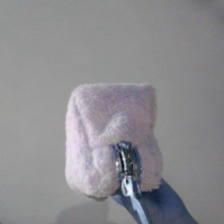

1/1 [==============================] - 0s 17ms/step
-------------
Este producto es = Comestiquera


In [ ]:
test_files = os.listdir(test_path)
folder = random.choice (test_files)
image_text = random.choice(os.listdir(test_path+'/'+folder))

img = load_img(test_path+'/'+folder+'/'+image_text)
img = img_to_array(img)
sup_img = img

shw_img = cv2.resize(sup_img,(224,224))
cv2_imshow(shw_img)

img = img/255
img = cv2.resize(img,(224,224))

img = np.expand_dims(img,0)

prediction = model.predict(img)
prediction = np.argmax(prediction)


classification = label_dictionary[prediction]
print('-------------')
print('Este producto es = ' + classification)

# Predicción del modelo de red neuronal

## Predicción al usuario

### Subida del archivo externo

In [ ]:
from google.colab import files

upload_img = files.upload()

KeyboardInterrupt: 

### Predicción y juego

In [ ]:
user_input_img = str(upload_img).split(sep=':')
user_input_img = str(user_input_img[0]).split(sep='{')
user_input_img = user_input_img[1].replace("'","")

user_img = load_img('/content/' + user_input_img)


user_img = img_to_array(user_img)
sup_img = user_img

shw_img = cv2.resize(sup_img,(224,224))
cv2_imshow(shw_img)

user_img = user_img/255
user_img = cv2.resize(user_img,(224,224))

u_img = np.expand_dims(user_img,0)


user_input_prediction = model.predict(u_img)
user_prediction = np.argmax(user_input_prediction)

user_classification = label_dictionary[user_prediction]

print('-------------')
print('Este producto es = ' + user_classification)
print('-------------')

os.remove('/content/' + user_input_img)

### Para volver a probar una predicción de este modelo de red neuronal convolucional, por favor ejecuta las últimas dos celdas.